In [1]:
!pip install git+https://github.com/cleanlab/cleanvision.git

  Cloning https://github.com/cleanlab/cleanvision.git to /tmp/pip-req-build-6kw262sk
  Running command git clone --filter=blob:none --quiet https://github.com/cleanlab/cleanvision.git /tmp/pip-req-build-6kw262sk
  Resolved https://github.com/cleanlab/cleanvision.git to commit af3fc3ffbf062693d32630f3a2e3adf3efad6fe0
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 5.6 MB/s eta 0:00:00
  Created wheel for cleanvision: filename=cleanvision-0.3.6-py3-none-any.whl size=55648 sha256=6d14b010ba84337d9994d36bca9ba986f1aa37eb69f474eb7c87cd7c49eae0b9
  Stored in directory: /tmp/pip-ephem-wheel-cache-9j0rx9zm/wheels/62/b5/93/1e928b2ed86f4723a6f82d41084fe213c8e28e744104d35a0f
Successfully built cleanvision


In [2]:
!gdown 1hUqu1mbFeTEfBvl-7fc56fHFfCSzIktD

Downloading...
From: https://drive.google.com/uc?id=1hUqu1mbFeTEfBvl-7fc56fHFfCSzIktD
To: /content/ml1m.zip
100% 105M/105M [00:01<00:00, 55.4MB/s] 


In [3]:
!unzip -qq ml1m.zip -d ml1m

In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import shutil
import cv2
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from cleanvision.imagelab import Imagelab

def get_title(fpath):
    title=''
    split=fpath.split('/')
    for k in range(4, len(split)):
        title=title + split[k]+'/'
    return title

def resize_img(img):
    img_height=150
    img_width=int((img_height/img.shape[0])* img.shape[1])
    img=cv2.resize(img, (img_width, img_height))
    return img


def show_dups(dups, length, sdir):
    height=int ((length +1)*4)
    plt.figure(figsize=(15, height))# width, height
    for i in range(length):
        f1path=dups[i][0]
        f2path=dups[i][1]
        img1=cv2.imread(f1path)
        img1=resize_img(img1)
        img1=cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
        img2=cv2.imread(f2path)
        img2=resize_img(img2)
        img2=cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        j= i*2
        plt.subplot(length,2,j+1)
        title=f1path.replace(sdir, '')
        plt.title(title, color='blue', fontsize=14)
        plt.axis('off')
        plt.imshow(img1)
        plt.subplot(length,2,j+2)
        title=f2path.replace(sdir, '')
        plt.title(title,color='blue', fontsize=14)
        plt.axis('off')
        plt.imshow(img2)
    plt.show()

def show_images(paths, count,sdir):
    height=int((count+1))
    plt.figure(figsize=(15, height))
    for i in range(count):
        fpath=paths[i]
        img=cv2.imread(fpath)
        shape=img.shape
        imgh=150
        imgw=int(imgh*shape[1]/shape[0])
        img=cv2.resize(img, (imgw, imgh))
        img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        rows=int(count/4) +1
        plt.subplot(rows, 4, i+1)
        plt.axis('off')
        title=fpath.replace(sdir, '')
        plt.title(title, color='blue', fontsize=10)
        plt.imshow(img)
    plt.show()

def print_pairs(plist, title, sd, count):
    print('{0:^40s}{1:^40s}'.format('Original Image', title))
    for i in range(count):
        e=plist[i]
        ed0=e[0].replace(sd, '')
        ed1=e[1].replace(sd, '')
        print ('{0:^40s}{1:^40s}'.format(ed0, ed1))

        ed1=e[1].replace(sd, '')
        print ('{0:^40s}{1:^40s}'.format(ed0, ed1))

def analyze_dataset(sdir):
    slength=len(sdir)
    imagelab = Imagelab(sdir)
    imagelab.find_issues()
    #imagelab.report()
    print(imagelab.issue_summary)
    delete_list=[]

    exact_duplicates=list(imagelab.info['exact_duplicates']['sets'])
    length=len(exact_duplicates)
    if length == 0:
        print('No duplicate images were found')
    else:
        dup_count=0
        plist=[]
        for i, ed in enumerate(exact_duplicates):
            lengthp=len(ed)
            for j in range(1, lengthp):
                plist.append([ed[0], ed[j]])
                dup_count += 1
        print('there are ', dup_count, ' pairs of duplicate images, enter an integer for how many to print, enter 0 for no print out')
        ans=int(input(' '))
        if ans !=0:
            print_pairs(plist, 'duplicate image', sdir, ans)
        ans=int(input(' enter an integer for how many duplicate pairs to plot, enter 0 for no plot'))
        if ans != 0:
            show_dups( plist, ans, sdir)
        print('enter D to delete all exact duplicates or press Enter to not delete')
        ans=input(' ')
        if ans == 'D' or ans == 'd':
            for i, ed in enumerate(exact_duplicates):
                lengthp=len(ed)
                for j in range(1, lengthp):
                    if ed[j] not in delete_list:
                        delete_list.append(ed[j])

    near_duplicates=list(imagelab.info['near_duplicates']['sets'])
    length=len(near_duplicates)
    if length == 0:
        print('No near duplicate images were found')
    else:
        dup_count=0
        plist=[]
        for i, ed in enumerate(near_duplicates):
            lengthp=len(ed)
            for j in range(1, lengthp):
                plist.append([ed[0], ed[j]])
                dup_count += 1
        print('there are ', dup_count, ' pairs of near duplicate images, enter an integer for how many to print, enter 0 for no print out')
        ans=int(input(' '))
        if ans !=0:
            print_pairs(plist, 'near duplicate image', sdir, ans)
        ans=int(input(' enter an integer for how many near duplicate pairs to plot, enter 0 for no plot'))
        if ans != 0:
            show_dups( plist, ans, sdir)
        print('enter D to delete all near duplicates or press Enter to not delete')
        ans=input(' ')
        if ans == 'D' or ans == 'd':
            for i, ed in enumerate(near_duplicates):
                lengthp=len(ed)
                for j in range(1, lengthp):
                    if ed[j] not in delete_list:
                        delete_list.append(ed[j])
    to_light = imagelab.issues[imagelab.issues["is_light_issue"] == True].sort_values(by=['light_score']).index.tolist()
    length=len(to_light)
    if length == 0:
        print('There are no images that are to light')
    else:
        print('there are ', length, ' to light images, enter an integer for how many to print, enter 0 for no print out')
        ans=int(input(' '))
        if ans !=0:
            for i in range (ans):
                print(to_light[i])


        ans=int(input(' enter an integer for how many to light images to plot, enter 0 for no plot'))
        if ans != 0:
            show_images(to_light, ans, sdir)
        print('Enter D to delete ', length, ' to light images, to not delete press enter')
        ans=input(' ' )
        if ans == 'D' or ans == 'd':
            for imgpath in to_light:
                if imgpath not in delete_list:
                    delete_list.append(imgpath)

    to_dark = imagelab.issues[imagelab.issues["is_dark_issue"] == True].sort_values(by=['dark_score']).index.tolist()
    length=len(to_dark)
    if length == 0:
        print('There are no images that are to dark')
    else:
        print('there are ', length, ' to dark images, enter an integer for how many to print, enter 0 for no print out')
        ans=int(input(' '))
        if ans !=0:
            for i in range (ans):
              print(to_dark[i])

        ans=int(input(' enter an integer for how many to dark images to plot, enter 0 for no plot'))
        if ans != 0:
            show_images(to_dark, ans, sdir)
        print('Enter D to delete the ', length, ' to dark images, to not delete press Enter ')
        ans=input(' ' )
        if ans == 'D' or ans == 'd':
            for imgpath in to_dark:
                if imgpath not in delete_list:
                    delete_list.append(imgpath)

    blurry_images = imagelab.issues[imagelab.issues["is_blurry_issue"] == True].sort_values(by=['blurry_score']).index.tolist()
    length=len(blurry_images)
    if length == 0:
        print('There are no blurry images ')
    else:
        print('there are ', length, ' blurry images, enter an integer for how many to print, enter 0 for no print out')
        ans=int(input(' '))
        if ans !=0:
            for i in range (ans):
              print(blurry_images[i])
        ans=int(input(' enter an integer for how many to blurry images to plot, enter 0 for no plot'))
        if ans != 0:
            show_images(blurry_images, ans, sdir)
        print('Enter D to delete all ', length, ' to blurry images, to not delete press Enter ')
        ans=input(' ' )
        if ans == 'D' or ans == 'd':
            for imgpath in blurry_images:
                if imgpath not in delete_list:
                    delete_list.append(imgpath)

    no_info = imagelab.issues[imagelab.issues["is_low_information_issue"] == True].sort_values(by=['low_information_score']).index.tolist()
    length=len(no_info)
    if length == 0:
        print('No  low information images were found')
    else:
        print('there are ', length, ' low information images, enter an integer for how many to print, enter 0 for no print out')
        ans=int(input(' '))
        if ans !=0:
            for i in range (ans):
              print(no_info[i])
        ans=int(input(' enter an integer for how many to low information images to plot, enter 0 for no plot'))
        if ans != 0:
            show_images(no_info, ans,sdir)
        print('Enter D to delete all ', length, ' to low info images, to not delete press Enter ')
        ans=input(' ' )
        if ans == 'D' or ans == 'd':
            for imgpath in no_info:
                if imgpath not in delete_list:
                    delete_list.append(imgpath)
    print('*****  Data set processing is completed  *****')
    return delete_list

Reading images from /content/ml1m
Checking for dark, light, odd_aspect_ratio, low_information, exact_duplicates, near_duplicates, blurry, grayscale, odd_size images ...


  0%|          | 0/3256 [00:00<?, ?it/s]

  0%|          | 0/3256 [00:00<?, ?it/s]

Issue checks completed. 23 issues found in the dataset. To see a detailed report of issues found, use imagelab.report().
         issue_type  num_images
0  exact_duplicates          18
1   low_information           3
2         grayscale           2
3            blurry           0
4              dark           0
5             light           0
6  odd_aspect_ratio           0
7          odd_size           0
8   near_duplicates           0
there are  9  pairs of duplicate images, enter an integer for how many to print, enter 0 for no print out
 0
 enter an integer for how many duplicate pairs to plot, enter 0 for no plot9


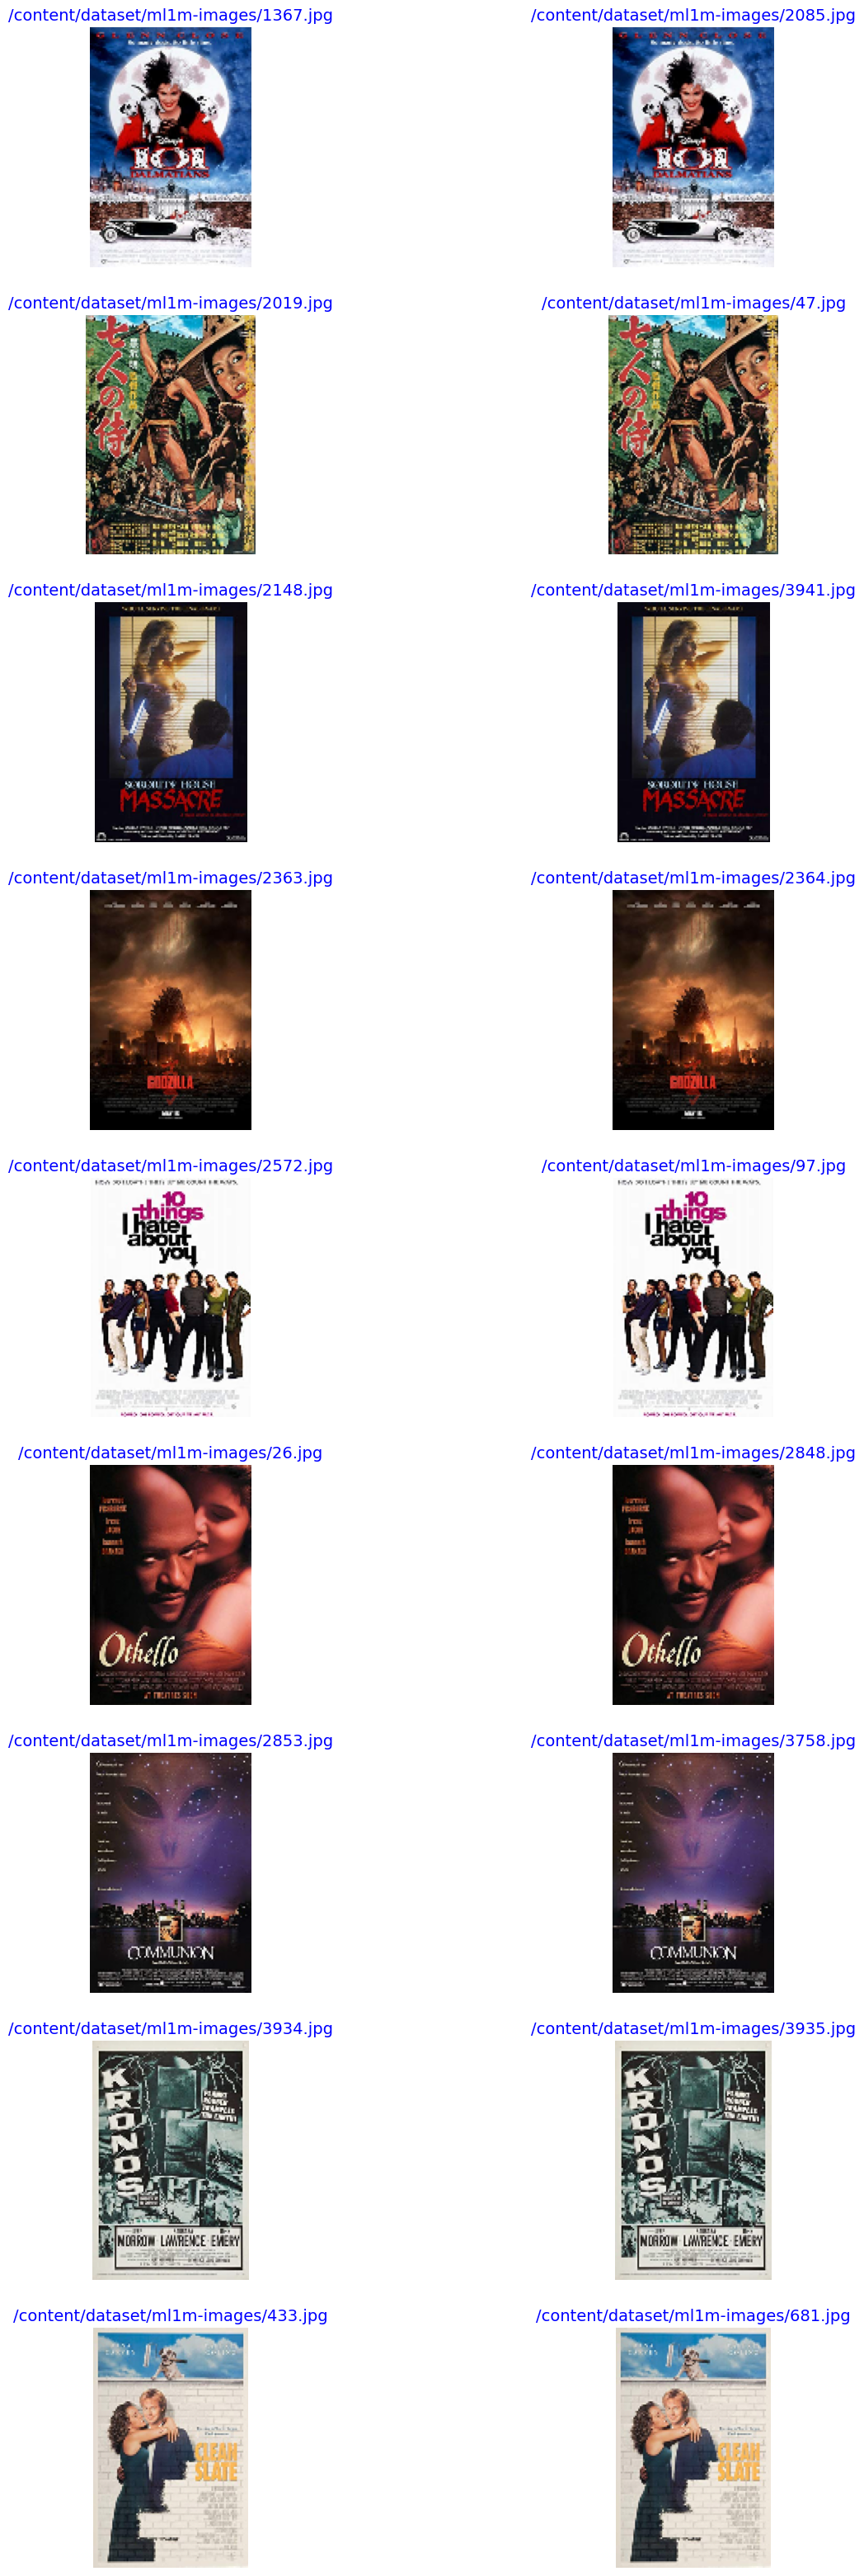

enter D to delete all exact duplicates or press Enter to not delete
 D
No near duplicate images were found
There are no images that are to light
There are no images that are to dark
There are no blurry images 
there are  3  low information images, enter an integer for how many to print, enter 0 for no print out
 3
/content/ml1m/content/dataset/ml1m-images/769.jpg
/content/ml1m/content/dataset/ml1m-images/1421.jpg
/content/ml1m/content/dataset/ml1m-images/571.jpg
 enter an integer for how many to low information images to plot, enter 0 for no plot3


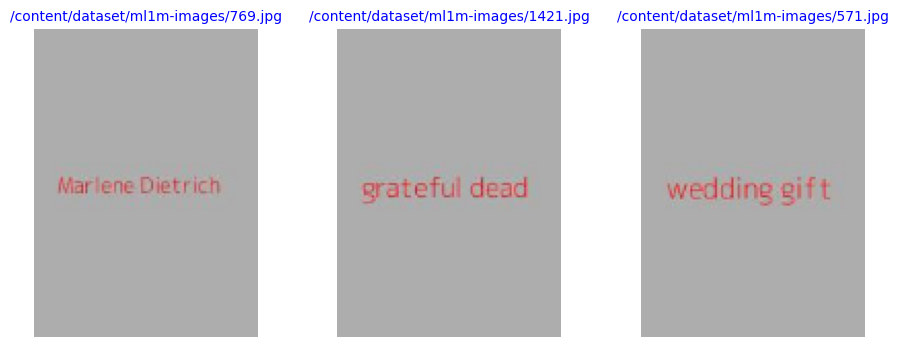

Enter D to delete all  3  to low info images, to not delete press Enter 
 d
*****  Data set processing is completed  *****


In [7]:
# Note: for a large number of image files this may take a considerable amount of time for the code to complete
source_dir=r'/content/ml1m'
delete_list=analyze_dataset(source_dir)

In [8]:
delete_list

['/content/ml1m/content/dataset/ml1m-images/2085.jpg',
 '/content/ml1m/content/dataset/ml1m-images/47.jpg',
 '/content/ml1m/content/dataset/ml1m-images/3941.jpg',
 '/content/ml1m/content/dataset/ml1m-images/2364.jpg',
 '/content/ml1m/content/dataset/ml1m-images/97.jpg',
 '/content/ml1m/content/dataset/ml1m-images/2848.jpg',
 '/content/ml1m/content/dataset/ml1m-images/3758.jpg',
 '/content/ml1m/content/dataset/ml1m-images/3935.jpg',
 '/content/ml1m/content/dataset/ml1m-images/681.jpg',
 '/content/ml1m/content/dataset/ml1m-images/769.jpg',
 '/content/ml1m/content/dataset/ml1m-images/1421.jpg',
 '/content/ml1m/content/dataset/ml1m-images/571.jpg']

In [10]:
index=source_dir.rfind('/')
name=source_dir[index+1:]
if len(delete_list) ==0:
    print('no files were deleted, the dataset remains unchanges\d')
else:
    print('copying dataset to directory, for a large number of files this mat take several minutes')
    working_dir=r'/content/output'
    destination_dir=os.path.join(working_dir, name)
    if os.path.isdir(destination_dir):
        shutil.rmtree(destination_dir) # make sure there is no existing destination directory
    shutil.copytree(source_dir, destination_dir)
    print('the dataset has been copied to the directory')

    for imgpath in delete_list:
        parse_path=imgpath[index+1:]
        remove_path=os.path.join(working_dir, parse_path)
        os.remove(remove_path)
    print(len(delete_list), ' images were deleted, the dataset in ', working_dir, ' contains the corrected data set')


copying dataset to directory, for a large number of files this mat take several minutes
the dataset has been copied to the directory
12  images were deleted, the dataset in  /content/output  contains the corrected data set


In [11]:
movies_train = pd.read_csv('/content/ml1m/content/dataset/movies_train.dat', engine='python',
                         sep='::', names=['movieid', 'title', 'genre'], encoding='latin-1', index_col=False)
movies_test = pd.read_csv('/content/ml1m/content/dataset/movies_test.dat', engine='python',
                         sep='::', names=['movieid', 'title', 'genre'], encoding='latin-1', index_col=False)

movies_test

,movieid,title,genre
0,3397,"Great Muppet Caper, The (1981)",Children's|Comedy
1,2067,Doctor Zhivago (1965),Drama|Romance|War
2,2651,Frankenstein Meets the Wolf Man (1943),Horror
3,2989,For Your Eyes Only (1981),Action
4,3415,"Mirror, The (Zerkalo) (1975)",Drama
...,...,...,...
772,2309,"Inheritors, The (Die Siebtelbauern) (1998)",Drama
773,2421,"Karate Kid, Part II, The (1986)",Action|Adventure|Drama
774,3255,"League of Their Own, A (1992)",Comedy|Drama
775,974,Algiers (1938),Drama|Romance


In [12]:
movies_train

,movieid,title,genre
0,1650,Washington Square (1997),Drama
1,185,"Net, The (1995)",Sci-Fi|Thriller
2,1377,Batman Returns (1992),Action|Adventure|Comedy|Crime
3,3204,"Boys from Brazil, The (1978)",Thriller
4,1901,Dear Jesse (1997),Documentary
...,...,...,...
3101,2539,Analyze This (1999),Comedy
3102,3038,"Face in the Crowd, A (1957)",Drama
3103,1832,Heaven's Burning (1997),Action|Drama
3104,657,Yankee Zulu (1994),Comedy|Drama


In [13]:

import os
delete_ = []
for index, file_path in enumerate(delete_list):
# Lấy tên file từ đường dẫn
  file_name = os.path.basename(file_path)
# Lấy phần số từ tên file
  delete_.append(int(os.path.splitext(file_name)[0]))
print(delete_)

[2085, 47, 3941, 2364, 97, 2848, 3758, 3935, 681, 769, 1421, 571]


In [14]:
delete_ = [2085, 47, 3941, 2364, 97, 2848, 3758, 3935, 681, 769, 1421, 571]

In [15]:
def check_exist(data, delete_list_data):
  sourcedir = '/content/output/ml1m/content/dataset/ml1m-images'
  for i in range(data.shape[0]):
    file_name = str(data['movieid'][i])+'.jpg'
    flag = True
    for path in os.listdir(sourcedir):
      if file_name == path:
        flag = False
        continue
    if(flag):
      # print(data['movieid'][i])
      delete_list_data.append(data['movieid'][i])

In [16]:
delete_list_train = delete_
delete_list_test = delete_

In [17]:
check_exist(movies_train, delete_list_train)

check_exist(movies_test, delete_list_test)


In [19]:
print(len(delete_list_train))
print(len(delete_list_test))

651
651


In [20]:
movies_train_update = movies_train[~movies_train['movieid'].isin(delete_list_train)]
movies_test_update = movies_test[~movies_test['movieid'].isin(delete_list_test)]

movies_train_update

,movieid,title,genre
0,1650,Washington Square (1997),Drama
1,185,"Net, The (1995)",Sci-Fi|Thriller
2,1377,Batman Returns (1992),Action|Adventure|Comedy|Crime
3,3204,"Boys from Brazil, The (1978)",Thriller
7,2382,Police Academy 5: Assignment: Miami Beach (1988),Comedy
...,...,...,...
3099,2921,High Plains Drifter (1972),Western
3100,502,"Next Karate Kid, The (1994)",Action|Children's
3101,2539,Analyze This (1999),Comedy
3102,3038,"Face in the Crowd, A (1957)",Drama


In [21]:
movies_test_update

,movieid,title,genre
0,3397,"Great Muppet Caper, The (1981)",Children's|Comedy
1,2067,Doctor Zhivago (1965),Drama|Romance|War
2,2651,Frankenstein Meets the Wolf Man (1943),Horror
3,2989,For Your Eyes Only (1981),Action
4,3415,"Mirror, The (Zerkalo) (1975)",Drama
...,...,...,...
771,1286,Somewhere in Time (1980),Drama|Romance
773,2421,"Karate Kid, Part II, The (1986)",Action|Adventure|Drama
774,3255,"League of Their Own, A (1992)",Comedy|Drama
775,974,Algiers (1938),Drama|Romance


In [22]:
  new_file_train_path = '/content/output/movies_train_update.DAT'
  movies_train_update.to_csv(new_file_train_path, sep=',', encoding='latin-1', index=False, header = False)
  new_file_test_path = '/content/output/movies_test_update.DAT'
  movies_test_update.to_csv(new_file_test_path, sep=',', encoding='latin-1', index=False, header = False)

In [24]:
movies_train_update1 = pd.read_csv('/content/output/movies_train_update.DAT', engine='python',
                         sep=',', names=['movieid', 'title', 'genre'], encoding='latin-1', index_col=False)
movies_train_update1


,movieid,title,genre
0,1650,Washington Square (1997),Drama
1,185,"Net, The (1995)",Sci-Fi|Thriller
2,1377,Batman Returns (1992),Action|Adventure|Comedy|Crime
3,3204,"Boys from Brazil, The (1978)",Thriller
4,2382,Police Academy 5: Assignment: Miami Beach (1988),Comedy
...,...,...,...
2588,2921,High Plains Drifter (1972),Western
2589,502,"Next Karate Kid, The (1994)",Action|Children's
2590,2539,Analyze This (1999),Comedy
2591,3038,"Face in the Crowd, A (1957)",Drama


In [25]:
movies_train_update1 = pd.read_csv('/content/output/movies_test_update.DAT', engine='python',
                         sep=',', names=['movieid', 'title', 'genre'], encoding='latin-1', index_col=False)
movies_train_update1


,movieid,title,genre
0,3397,"Great Muppet Caper, The (1981)",Children's|Comedy
1,2067,Doctor Zhivago (1965),Drama|Romance|War
2,2651,Frankenstein Meets the Wolf Man (1943),Horror
3,2989,For Your Eyes Only (1981),Action
4,3415,"Mirror, The (Zerkalo) (1975)",Drama
...,...,...,...
646,1286,Somewhere in Time (1980),Drama|Romance
647,2421,"Karate Kid, Part II, The (1986)",Action|Adventure|Drama
648,3255,"League of Their Own, A (1992)",Comedy|Drama
649,974,Algiers (1938),Drama|Romance
